# Decision Tree
___

Un arbol de decisión es una función que toma un vector o dataset como parámetro de entrada y genera un resultado llamado decisión, esta decisión puede ser un valor discreto o continuo.

### Nodos del árbol

Existen dos tipos de nodos en un árbol de decisión, ramas y hojas, las ramas contienen los predicados o "preguntas" que permiten tomar una decisión al algoritmo, por otra parte, las hojas contienen la decisión a la que se llega mediante los predicados en las ramas del árbol.

### Selección de predicados

La selección de un predicado en un nivel del árbol determina que tanto se disminuirá la incertidumbre de los datos en el siguiente nivel para así poder llegar una decisión lo más acertada posible, es por esto que elegir el mejor predicado para dividir el árbol es la tarea más importante. A continuación un ejemplo para ilustrar la escogencia de atributos:



### Imports

In [1]:
import math
import graphviz
import csv

### Dataset
El siguiente dataset consta de un registro de desiciones sobre si realizar o no una tarea tomando en cuenta factores como el valor de la tarea, el curso al que corresponde, el interés del estudiante sobre la tarea, limitación del tiempo, el conocimiento sobre el tema de la tarea y la nota actual del estudiante.

In [2]:
columnas = ['Tipo', 'Curso', 'Interes', 'Tiempo Disponible', 'Conocimiento','Clasificador']
dataset = [
        ["Proyecto corto", 'IA', 'Medio', 'Alto', 'Medio','Si'],
        ["Examen", 'IA', 'Alto', 'Alto', 'Bajo','Si'],
        ["Tarea", 'Seminario','Medio', 'Bajo', 'Alto','No'],
        ["Proyecto", 'AP', 'Bajo', 'Medio', 'Alto','Si'],
        ["Tarea", 'Seminario', 'Alto', 'Alto', 'Medio','Si'],
        ["Proyecto corto", 'AP', 'Medio', 'Medio', 'Bajo','No'],
        ["Examen", 'Seminario', 'Bajo', 'Medio', 'Alto', 'No'],
        ["Proyecto", 'AP', 'Bajo', 'Alto', 'Bajo','Si'],
        ["Proyecto", 'Redes', 'Medio', 'Medio', 'Medio', 'No'],
        ["Examen", 'Seminario', 'Bajo', 'Bajo', 'Medio', 'Si'],
        ["Proyecto corto", 'IA', 'Bajo', 'Alto', 'Bajo', 'Si'],
        ["Examen", 'Seminario', 'Alto', 'Medio', 'Alto', 'No'],
        ["Tarea", 'AP', 'Medio', 'Bajo', 'Bajo','No'],
        ["Proyecto", 'IA', 'Medio', 'Medio', 'Medio', 'Si'],
        ["Tarea", 'Redes', 'Alto', 'Medio', 'Medio','No'],
        ["Examen", 'Redes', 'Alto', 'Bajo', 'Alto', 'Si'],
        ["Proyecto", 'Seminario', 'Alto', 'Bajo', 'Alto', 'Si'],
        ["Proyecto", 'IA', 'Bajo', 'Medio', 'Medio','Si'],
        ["Tarea", 'AP', 'Medio', 'Medio', 'Bajo','Si'],
        ["Tarea", 'IA', 'Medio', 'Medio', 'Bajo','Si'],
        ["Examen", 'Seminario', 'Bajo', 'Medio', 'Bajo','No'],
]

In [3]:
print_var = True
def contador_goal(filas):
    """Recibe el dataset restante y devuelve la cantidad de filas encontradas 
    por cada uno de las etiquetas de la columna clasificadora.
    """
    contador = {}
    for fila in filas:
        tag = fila[-1]
        if tag not in contador:
            contador[tag] = 0
        contador[tag] += 1
    return contador

def pluralidad(diccionario):
    """ Ante predicciones compuestas en hojas
    se elige el de mayor probabilidad
    """
    mayor = {'Yes':0}
    for atributo in diccionario:
        if (diccionario[atributo]>=mayor[list(mayor)[0]]):
            mayor = {atributo : diccionario[atributo]}
    return mayor

def particion(filas, criterio):
    """Función encargada de partir el dataset dependiendo del criterio
    """
    yes_filas, no_filas = [], []
    for fila in filas:
        if criterio.match(fila):
            yes_filas.append(fila)
        else:
            no_filas.append(fila)
    return yes_filas, no_filas


In [4]:
class Criterio:
    """Clase que alberga el criterio de división de ramas por nodo.
    """
    def __init__(self, columna, valor):
        self.columna = columna
        self.valor = valor

    def match(self, ejemplo):
        val = ejemplo[self.columna]
        if isinstance(val, int) or isinstance(val, float): #Si es un valor numérico, su comparación en >=
            return val >= self.valor
        else:
            return val == self.valor

    def __repr__(self):
        condition = "=="
        if isinstance(self.valor, int) or isinstance(self.valor, float):
            condition = ">="
        return "%s %s %s" % (
            columnas[self.columna], condition, str(self.valor))
    
class Nodo:
    """Nodo de decision
    contiene las dos ramas y el criterio de división
    """

    def __init__(self,criterio,
                 yes_rama,
                 no_rama,
                 ganancia):
        self.criterio = criterio
        self.ganancia = round(ganancia, 4)
        self.yes_rama = yes_rama
        self.no_rama = no_rama
        
class Hoja:
    def __init__(self, filas):
         self.prediccion = pluralidad(contador_goal(filas))


### Entropia de Shannon
La entropia de un sistema se refiere a la medida de incertidumbre. Un sistema totalmente parcial no posee incertidumbre probabilistica, por lo cual su entropía es cero. Mientras tanto, un sistema con igual probabilidad en cada uno de sus posibilidades es un sistema inparcial cuya entropía corresponde a uno. La fórmula usada para calcular la entropía de la variable V  con d cantidad distinto de valores es la siguiente:

$$ - \sum_{k = 1}^{d} P(v_{k}) log_{2} P(v_{k}) $$

In [5]:
def entropia(filas):
    """Función encargada de calcular la entropía
    """
    contador = contador_goal(filas)
    entropia = 0
    for tag in contador:
        probabilidad = contador[tag] / float(len(filas))
        entropia += probabilidad * math.log2(probabilidad) # sumatoria de la probabilidad de cada atributo por su log2
    return entropia * -1

### Ganancia
La ganancia se refiere a la cantidad de entropia resultante de un sistema luego de que el conjunto de datos haya sido dividido a base de un atributo en específico. Su fórmula esta dada por la entropía menos el residuo que otorga la selección del atributo. El residuo es calculado de la siguiente manera:

$$ Residuo(A) = \sum_{k=1}^{d} \frac{p_{k} + n_{k}}{p+n} * Entropia( \frac {p_{k}}{p_{k}+n_{k}} ) $$

In [6]:
def ganancia(izq, der, incertidumbre):
    """Función encargada de calcular la ganancia
    """
    p = float(len(izq)) / (len(izq) + len(der))
    residuo = p * entropia(izq) + (1 - p) * entropia(der)
    ganancia_total = incertidumbre - residuo
    
    if print_var:
        print(": " + str(round(incertidumbre, 4)) + " - "+ str(round(residuo, 4)) + " = " 
                        +  str(round(ganancia_total, 4)))
    return ganancia_total

In [7]:
def mejor_atributo(filas):
    """ Función encargada de calcular toda la ganacia de atributos y escoger
    el que mayor ganancia otorga.
    """
    mejor_ganancia = 0 
    mejor_criterio = None 
    incertidumbre = entropia(filas)
    cant_atributos = len(filas[0]) - 1 
    
    for col in range(cant_atributos):
        if print_var:
            print(columnas[col])
        valores = set([row[col] for row in filas]) 
        for val in valores: 
            
            if print_var:
                print("   "+ str(val), end='')
                
            criterio = Criterio(col, val)
            yes_filas, no_filas = particion(filas, criterio)
            
            #Si alguno de los atributos es totalmente parcial, no se
            #calcula la ganancia
            if len(yes_filas) == 0 or len(no_filas) == 0:
                if print_var:
                    print(" : Totalmente parcial ")
                continue
                
            ganancia_atributo = ganancia(yes_filas, no_filas, incertidumbre)
            if ganancia_atributo >= mejor_ganancia:
                mejor_ganancia, mejor_criterio = ganancia_atributo, criterio
    if print_var:
        print("Mejor ganancia: "+ str(mejor_ganancia))
        print("--------------------------------------------------------------")
    return mejor_ganancia, mejor_criterio

In [8]:
def contruccion_arbol(filas):
    """Función recursiva encargada de la creación del arbol
    se hace dos llamadas recursivas por nodo, las cuales corresponden a las ramas.
    """

    ganancia, criterio = mejor_atributo(filas)

    #Si la ganancia es cero
    #se crea una hoja
    if ganancia == 0:
        return Hoja(filas)

    yes_filas, no_filas = particion(filas, criterio)
    yes_branch = contruccion_arbol(yes_filas)
    no_branch = contruccion_arbol(no_filas)
    return Nodo(criterio, yes_branch, no_branch, ganancia)

In [9]:
G = graphviz.Digraph()
node_id=0
def imprimir_arbol(node):

    global node_id
    if isinstance(node, Hoja):
        hoja = str(node_id)
        G.node(hoja, label = str(node.prediccion), style="rounded, filled", shape="box", fillcolor="lightgreen")
        node_id += 1
        return hoja

    rama = str(node_id)
    G.node(rama, label = str(node.criterio) + "\n ganancia:" + str(node.ganancia), style="rounded, filled", shape="box")
    node_id += 1

    G.edge(rama, imprimir_arbol(node.yes_rama), label = "true")

    G.edge(rama, imprimir_arbol(node.no_rama), label = "false")

    return rama

arbol_decision = contruccion_arbol(dataset)


Tipo
   Proyecto: 0.9587 - 0.8977 = 0.061
   Examen: 0.9587 - 0.9416 = 0.0171
   Proyecto corto: 0.9587 - 0.9575 = 0.0012
   Tarea: 0.9587 - 0.9416 = 0.0171
Curso
   IA: 0.9587 - 0.712 = 0.2467
   Redes: 0.9587 - 0.9183 = 0.0404
   AP: 0.9587 - 0.9584 = 0.0003
   Seminario: 0.9587 - 0.9038 = 0.0549
Interes
   Bajo: 0.9587 - 0.9445 = 0.0142
   Alto: 0.9587 - 0.9559 = 0.0028
   Medio: 0.9587 - 0.9322 = 0.0265
Tiempo Disponible
   Bajo: 0.9587 - 0.9584 = 0.0003
   Alto: 0.9587 - 0.7619 = 0.1968
   Medio: 0.9587 - 0.8645 = 0.0943
Conocimiento
   Bajo: 0.9587 - 0.9586 = 0.0001
   Alto: 0.9587 - 0.9416 = 0.0171
   Medio: 0.9587 - 0.9445 = 0.0142
Mejor ganancia: 0.2467178601331056
--------------------------------------------------------------
Tipo
   Proyecto: -0.0 - -0.0 = 0.0
   Examen: -0.0 - -0.0 = 0.0
   Proyecto corto: -0.0 - -0.0 = 0.0
   Tarea: -0.0 - -0.0 = 0.0
Curso
   IA : Totalmente parcial 
Interes
   Bajo: -0.0 - -0.0 = 0.0
   Alto: -0.0 - -0.0 = 0.0
   Medio: -0.0 - -0.0 = 0.0


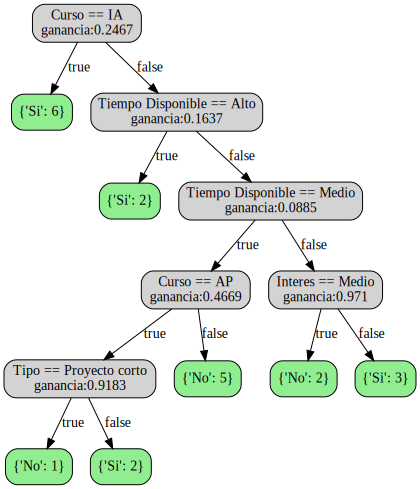

In [10]:
G = graphviz.Digraph()
imprimir_arbol(arbol_decision)
G

# Random Forest
___

Random Forest es una función que toma un vector o dataset como parámetro de entrada y genera un resultado llamado decisión, esta decisión puede ser un valor discreto o continuo. Este algoritmo construye $n$ árboles de decisión, cada uno de los árboles recibe una muestra de tamaño $m$ del dataset elegida de manera aleatoria y son construidos basado en sus correspondientes muestras. Una vez creados los árboles, una decisión es tomada enviando el vector de entrada a cada uno de los árboles para que tomen decisiones individualmente, una vez que todos los árboles han tomado la decisión, el algoritmo cuenta las decisiones tomadas por los árboles, tomando la que tuvo la mayor ocurrencia como la decisión final, en otras palabras, se realiza una votación en donde cada árbol es un votante y gana la decisión que obtuvo la mayor cantidad de votos.

#### Ventajas

* Es un clasificador muy preciso para muchos tipos de dataset.
* Facilmente paralelizable, por lo que en grandes datasets corre eficientemente.
* Disminuye el over fitting al utilizar multiples árboles de decisión en lugar de uno.

#### Desventajas

* Over fitting al usar datasets que describen tareas ruidosas, por ejemplo, clasificación imágenes.


### Ejemplo
El siguiente ejemplo tiene como base un dataset de seguros medicos en Estados Unidos con las siguientes columnas: Género, BMI, Cantidad de Hijos, Fumador, Región, Edad. El dataset esta almacenado en el archivo dataset.csv y contiene 166 filas. Se partirá el dataset en subconjuntos de 56 filas para crear tres arboles. 

In [11]:
print_var = False #Para que no se muestren los prints de los cálculos

"""Función que se encarga de leer el archivo dataset.csv
y pasarlo en formato de lista de python
"""
with open('dataset.csv', 'r') as f:
  reader = csv.reader(f)
  dataset_seguros = list(reader)
    
"""División del dataset en grupos de 56 filas
y creación de 3 arboles
"""
subdataset = [dataset_seguros[x:x+56] for x in range(0, len(dataset_seguros), 56)]
arbol0 = contruccion_arbol(subdataset[0])
arbol1 = contruccion_arbol(subdataset[1])
arbol2 = contruccion_arbol(subdataset[2])

def resultado(fila, nodo):
    """Función que evalua un predicado en un arbol
    """
    if isinstance(nodo, Hoja):
        return next(iter(nodo.prediccion))
    if nodo.criterio.match(fila):
        return resultado(fila, nodo.yes_rama)
    else:
        return resultado(fila, nodo.no_rama)

    
def Random_Forest(ejemplo):
    print("La predicción del ejemplo "+str(ejemplo))
    print("Arbol 0 = " + str(resultado(ejemplo,arbol0)))
    print("Arbol 1 = " + str(resultado(ejemplo,arbol1)))
    print("Arbol 2 = " + str(resultado(ejemplo,arbol2)))
    
Random_Forest(['female','Normal','3','no','southwest','50']) #Resultado real: 10 000
Random_Forest(['male','Morbido','1','yes','northwest','40']) #Resultado real: 40 000
Random_Forest(['male','Sobrepeso','0','no','northwest','20']) #Resultado real: 1 000



La predicción del ejemplo ['female', 'Normal', '3', 'no', 'southwest', '50']
Arbol 0 = 10000
Arbol 1 = 10000
Arbol 2 = 10000
La predicción del ejemplo ['male', 'Morbido', '1', 'yes', 'northwest', '40']
Arbol 0 = 40000
Arbol 1 = 40000
Arbol 2 = 25000
La predicción del ejemplo ['male', 'Sobrepeso', '0', 'no', 'northwest', '20']
Arbol 0 = 5000
Arbol 1 = 1000
Arbol 2 = 1000
